The aim of this kernel is to detect hate speech (racist/sexist) in tweets.

In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#for sentiment
import nltk
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

#For Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score


import warnings 
warnings.filterwarnings("ignore")

In [2]:
train  = pd.read_csv("C:\\Users\\Admin\\Downloads\\train_E6oV3lV.csv (1)\\train_E6oV3lV.csv")

In [3]:
train.shape

(31962, 3)

In [4]:
df = train
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


Remove twitter handlers i.e., @user

In [5]:
train['cleaned_tweet'] = train.tweet.apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))


Text(0,0.5,'Frequency Count')

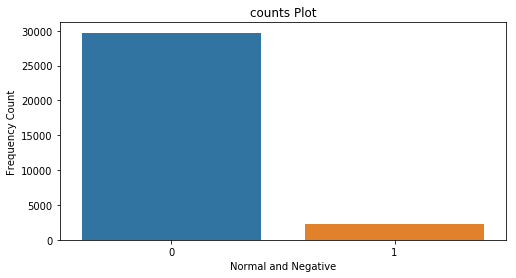

In [25]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="label", data=df)
plt.title('counts Plot')
plt.xlabel('Normal and Negative')
plt.ylabel('Frequency Count')

### Hashtags

In [6]:
#Select all words from normal tweet
normal_words = ' '.join([word for word in train['cleaned_tweet'][train['label'] == 0]])
#Collect all hashtags
pos_htag = [htag for htag in normal_words.split() if htag.startswith('#')]
#Remove hashtag symbol (#)
pos_htag = [pos_htag[i][1:] for i in range(len(pos_htag))]
#Count frequency of each word
pos_htag_freqcount = nltk.FreqDist(pos_htag)
pos_htag_df = pd.DataFrame({'Hashtag' : list(pos_htag_freqcount.keys()),
                            'Count' : list(pos_htag_freqcount.values())})

In [7]:
#normal_words

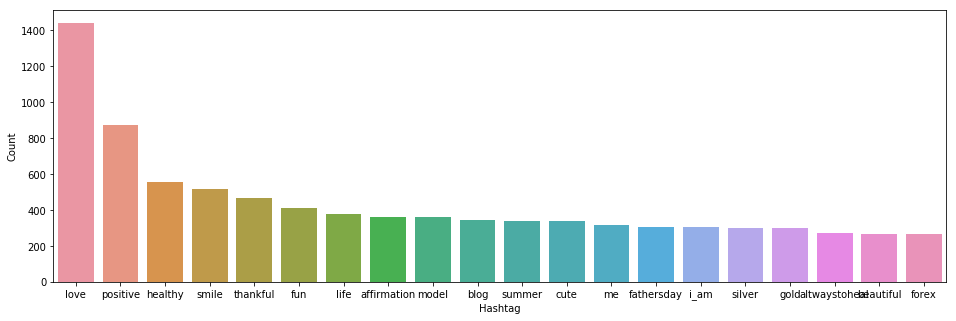

In [8]:
#Select top 20 most frequent hashtags and plot them   
most_frequent = pos_htag_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=most_frequent, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [9]:
#Repeat same steps for negative tweets
negative_words = ' '.join([word for word in train['cleaned_tweet'][train['label'] == 1]])
neg_htag = [htag for htag in negative_words.split() if htag.startswith('#')]
neg_htag = [neg_htag[i][1:] for i in range(len(neg_htag))]
neg_htag_freqcount = nltk.FreqDist(neg_htag)
neg_htag_df = pd.DataFrame({'Hashtag' : list(neg_htag_freqcount.keys()),
                            'Count' : list(neg_htag_freqcount.values())})

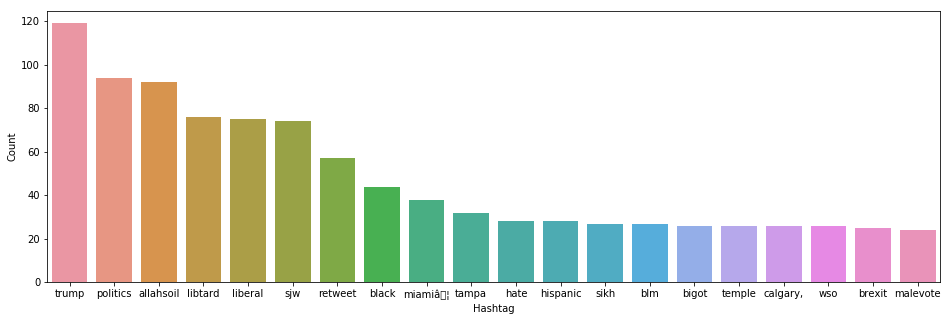

In [10]:
most_frequent = neg_htag_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=most_frequent, x= "Hashtag", y = "Count")
plt.show()

From both plots, we can conclude that hashtags are very important for sentiment analysis and should not be ignored.

## Finding common words in both classes of tweets using Visualization

### Normal Tweets

Normal words


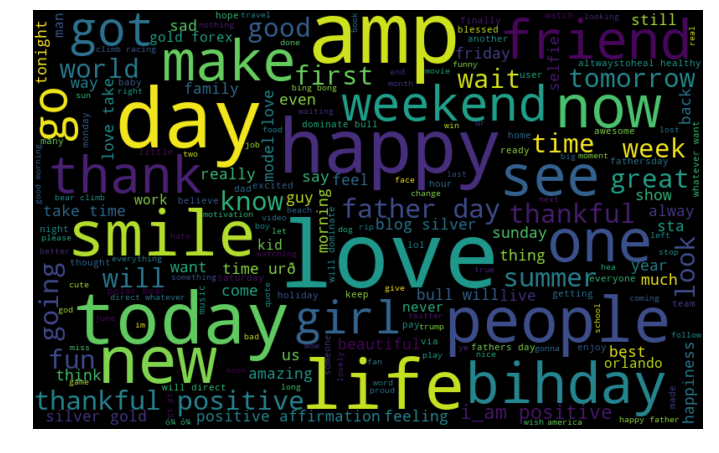

In [11]:
normal_words = ' '.join([word for word in train['cleaned_tweet'][train['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Racist/Sexist Tweets

Negative words


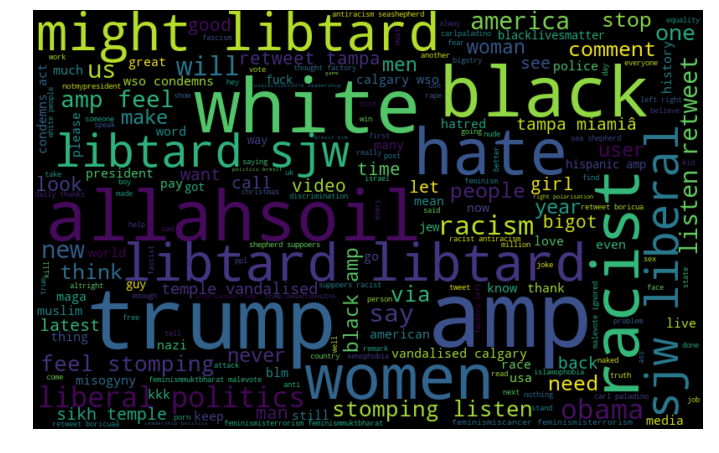

In [12]:
negative_words = ' '.join([word for word in train['cleaned_tweet'][train['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(negative_words)
print('Negative words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Words used like love, friend, happy are used in normal tweets whereas racist/sexist can be found in words like trump, black, politics etc.

In [13]:
train.sample(2)

,id,label,tweet,cleaned_tweet
2590,2591,0,@user lovely to see the @user brighton this m...,lovely to see the brighton this morning. great...
7472,7473,0,@user guitar is life. music is life. my life ...,guitar is life. music is life. my life is note...


In [14]:
train.shape

(31962, 4)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(train['cleaned_tweet'], train['label'], random_state = 0)
X_train.shape, X_val.shape

((23971,), (7991,))

## Applying Bag-of-Words

Rescale data using CountVectorizer
### CountVectorizer

In [16]:
vect = CountVectorizer().fit(X_train)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [17]:
print('Total features =', len(vect.get_feature_names()))
print(vect.get_feature_names()[::5000])

Total features = 34478
['00', 'btg', 'encouragement', 'ifcarlingdidperfectdays', 'mona', 'rdoequipment', 'technology']


In [18]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<23971x34478 sparse matrix of type '<class 'numpy.int64'>'
	with 266363 stored elements in Compressed Sparse Row format>

### Naive Bayes

In [35]:
from sklearn.metrics import accuracy_score
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(X_val))

print('MODEL fitting:', f1_score(y_val, pred))
print("accuracy of prediction",accuracy_score(y_val, pred))


MODEL fitting: 0.6502793296089385
accuracy of prediction 0.9608309348016518


In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val, pred)
cm

array([[7387,   73],
       [ 240,  291]], dtype=int64)

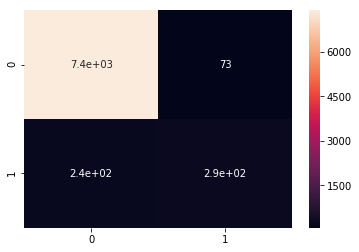

In [37]:
sns.heatmap(cm,annot=True)

### Logistic Regression

In [38]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(X_val))

In [39]:
print('MODEL fitting:', f1_score(y_val, pred))
print("accuracy of prediction",accuracy_score(y_val, pred))


MODEL fitting: 0.6447831184056272
accuracy of prediction 0.9620823426354649


In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val, pred)
cm

array([[7413,   47],
       [ 256,  275]], dtype=int64)

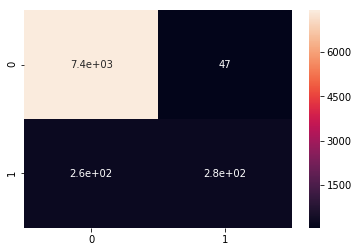

In [41]:
sns.heatmap(cm,annot=True)

# Random Forest

In [45]:
rf = RandomForestClassifier(n_estimators=10,
...                              random_state=0)

rf.fit(X_train_vectorized, y_train)
pred = rf.predict(vect.transform(X_val))

In [46]:
print('MODEL fitting:', f1_score(y_val, pred))
print("accuracy of prediction",accuracy_score(y_val, pred))


MODEL fitting: 0.6184049079754601
accuracy of prediction 0.9610812163684145


In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val, pred)
cm

array([[7428,   32],
       [ 279,  252]], dtype=int64)

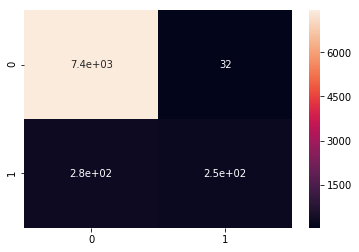

In [48]:
sns.heatmap(cm,annot=True)